## Activation maximization

---

### 0. Set up

In [1]:
# Install flashtorch if you don't have it

# !pip install flashtorch

In [2]:
import torchvision.models as models

from flashtorch.activemax import GradientAscent

### 1. Load a pre-trained Model

In [3]:
model = models.vgg16(pretrained=True)

# Print layers and corresponding indicies

list(model.features.named_children())

[('0', Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('1', ReLU(inplace=True)),
 ('2', Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('3', ReLU(inplace=True)),
 ('4',
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)),
 ('5', Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('6', ReLU(inplace=True)),
 ('7', Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('8', ReLU(inplace=True)),
 ('9',
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)),
 ('10', Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('11', ReLU(inplace=True)),
 ('12', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('13', ReLU(inplace=True)),
 ('14', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
 ('15', ReLU(inplace=True)),
 ('16',
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)),
 ('17'

In [4]:
# Specify layers and filters

conv1_2 = model.features[2]
conv1_2_filters = [17, 33, 34, 57]

conv2_1 = model.features[5]
conv2_1_filters = [27, 40, 68, 73]

conv3_1 = model.features[10]
conv3_1_filters = [31, 61, 147, 182]

conv4_1 = model.features[17]
conv4_1_filters = [238, 251, 338, 495]

conv5_1 = model.features[24]
conv5_1_filters = [45, 271, 363, 409]

### 2. Optimize and visualize filters

Creating an instance of `GradientAscent` class with the model _without fully-connected layers_ allows us to use flexible input image sizes.

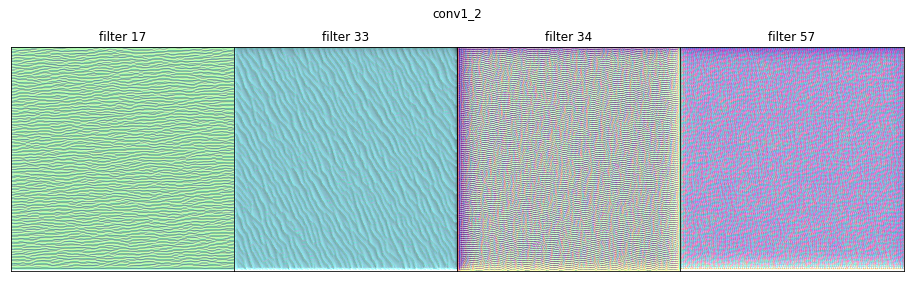

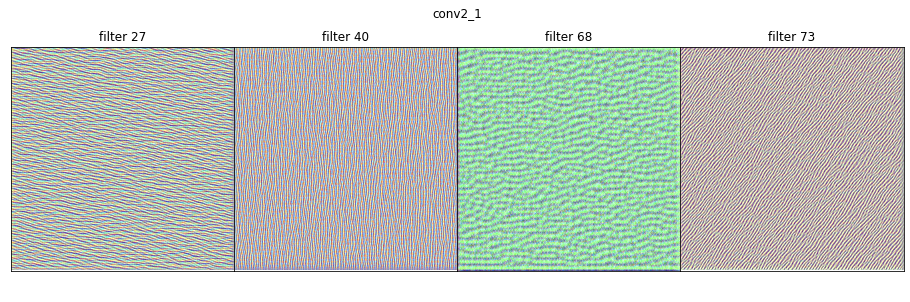

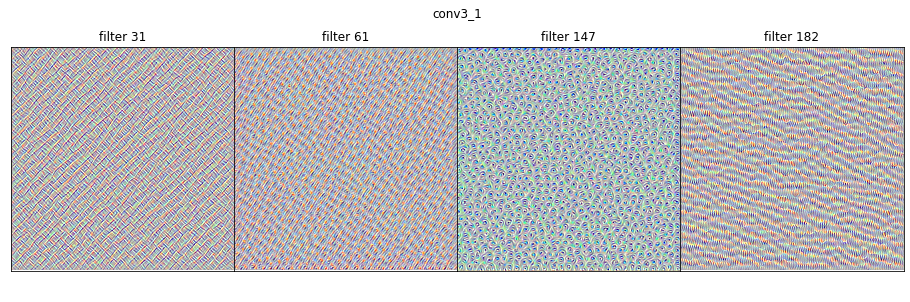

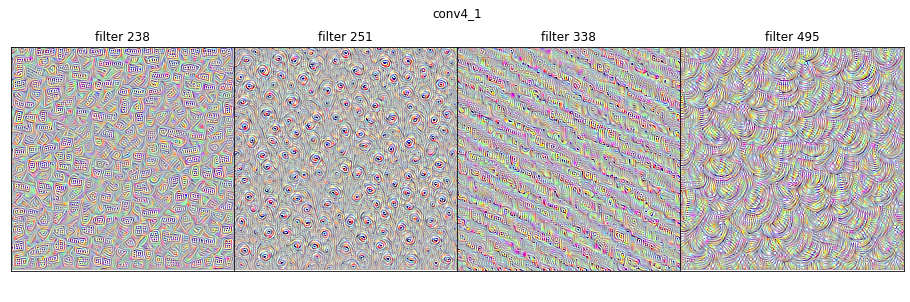

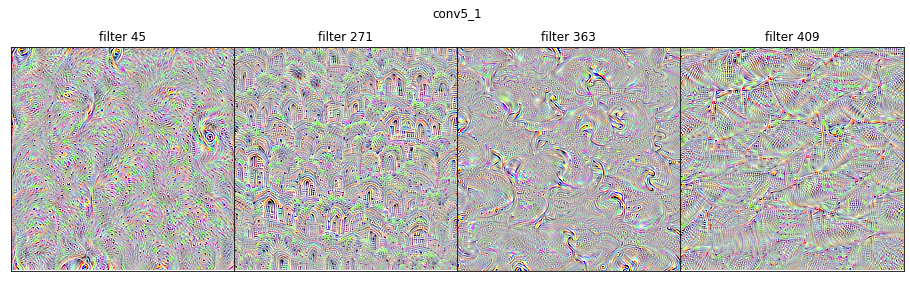

In [5]:
g_ascent = GradientAscent(model.features)

g_ascent.visualize(conv1_2, conv1_2_filters, title='conv1_2');
g_ascent.visualize(conv2_1, conv2_1_filters, title='conv2_1');
g_ascent.visualize(conv3_1, conv3_1_filters, title='conv3_1');
g_ascent.visualize(conv4_1, conv4_1_filters, title='conv4_1');
g_ascent.visualize(conv5_1, conv5_1_filters, title='conv5_1');

### 3. Other ways to optimize & visualize

#### 3-1. `visualize`: randomly select filters

If you have a convolutional layer you want to vizualise, but you don't know which filters to choose, you can just pass in the layer to `visualize` without `filter_idxs`. It will randomly choose filters. You can adjust the number of filters chosen by passing `num_subplots` (default=4).

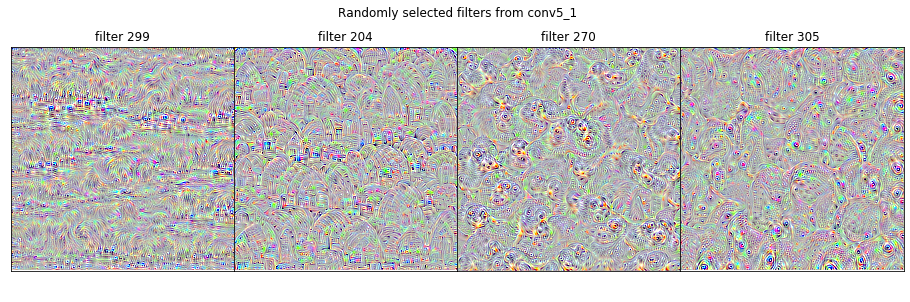

In [7]:
g_ascent.visualize(conv5_1, title='Randomly selected filters from conv5_1');

#### 3-2. `visualize`: plot one filter

If you just want to visualize one filter, you can do so by specifying the filter index as an integer.

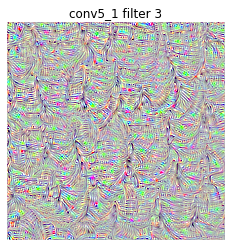

In [6]:
g_ascent.visualize(conv5_1, 3, title='conv5_1 filter 3');

#### 3-3. `visualize`: when you need the optimized image tensor

If you want to grab the optimized image data, set `return_output` to `True`.

num_iter: 30
optimized image: torch.Size([1, 3, 224, 224])


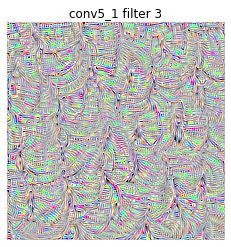

In [7]:

output = g_ascent.visualize(conv5_1, 3, title='conv5_1 filter 3', return_output=True);

print('num_iter:', len(output))
print('optimized image:', output[-1].shape)

#### 3-4. `optimize`: when no visualization is needed

If no visualization is needed, you can call the `optimize` method directly.

In [6]:
output = g_ascent.optimize(conv5_1, 3)

print('num_iter:', len(output))
print('optimized image:', output[-1].shape)

30
torch.Size([1, 3, 224, 224])
